In [1]:
# 10/16/2020
# This notebook demonstrates how to save run parameters and results from CFL

In [2]:
# imports
import cfl
from cfl.cfl_wrapper import make_CFL # include this in in
import numpy as np
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

X shape: (13140, 495)
Y shape: (13140, 495)


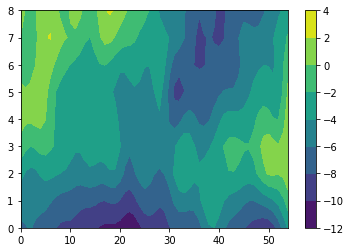

In [3]:
# load data
X, Y, coords = joblib.load('cfl_examples/el_nino/elnino_data.pkl')
imshape = (55, 9)
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

# plot an example image
plt.contourf(X[0].reshape(imshape).T)
plt.colorbar()
plt.show()

In [4]:
# set all CFL parameters

# generic data parameters
data_info = { 'X_dims' : X.shape, 
              'Y_dims' : Y.shape } 

# CDE parameters
lr = 1e-4
CDE_params = { 'batch_size'  : 32,
               'lr'          : lr, 
               'optimizer'   : 'adam',
               'n_epochs'    : 2,
               'verbose'     : True }

# clusterer parameters
cluster_params = { 'n_Xclusters' : 4, 
                   'n_Yclusters' : 4 }

# path setup: make a directory where you want to save your results and set path here
save_path = 'results/el_nino'

In [5]:
# build CFL object! 
cfl_object = make_CFL(  data_info=data_info, 
                        CDE_type='CondExp', 
                        cluster_type='Kmeans', 
                        CDE_params=CDE_params, 
                        cluster_params=cluster_params, 
                        save_path=save_path)

All results from this run will be saved to results/el_nino/run0011


Train on 9855 samples, validate on 3285 samples
Epoch 1/2
9855/9855 [==============================] - 6s 607us/sample - loss: 8.8725 - val_loss: 1.1497
Epoch 2/2
9855/9855 [==============================] - 3s 315us/sample - loss: 2.5718 - val_loss: 1.0629


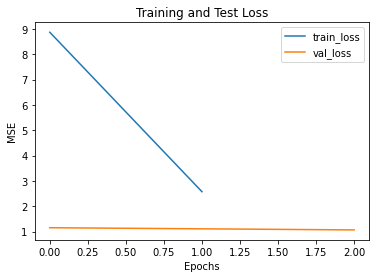

100%|██████████| 9855/9855 [06:58<00:00, 23.57it/s]


In [6]:
train_results = cfl_object.train(X, Y, standardize=True)

In [10]:
pyx = cfl_object.predict(X, Y, data_series='dataset1')

100%|██████████| 13140/13140 [09:49<00:00, 22.29it/s]


ValueError: Incorrect number of features. Got 3 features, expected 4.

In [14]:
pyx = cfl_object.CDE_model.predict(X, saver=cfl_object.saver)
xlbls = cfl_object.cluster_model.xkmeans.predict(pyx)

In [16]:
np.unique(xlbls)

array([0, 1, 3], dtype=int32)